In [7]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel
import cartopy as cp
# Open the NetCDF file
ncfile1 = Dataset("/data/wto/WRFOUT/Cali_5k300x300_UCMOff_250417/wrfout_d01_2020-06-01_00:00:00")
ncfile2= Dataset("/data/wto/WRFOUT/Sac_NDown_UCM0/wrfout_d01_2020-06-01_00:00:00")

### Plot of Pressure at the Surface (PSFC)

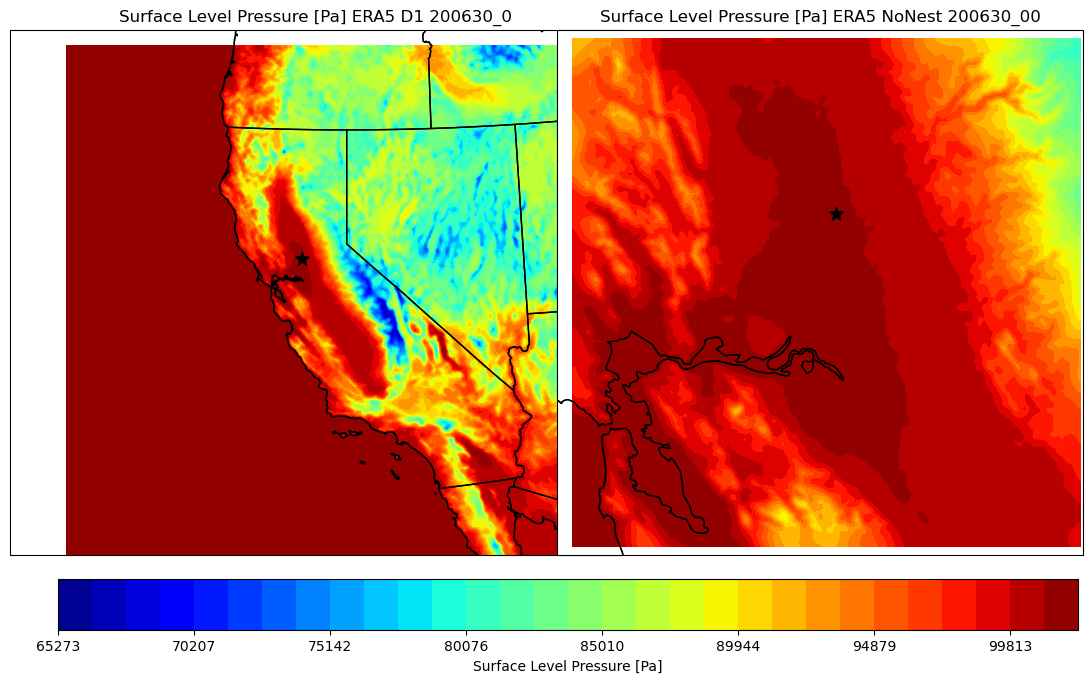

In [3]:
# Extract the 2-m level temperature
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")

#print(Var1)

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var1).min(), to_np(Var2).min()))
#print(vmin)
vmax = np.ceil(max(to_np(Var1).max(), to_np(Var2).max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 31)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.5}, figsize=(18, 8))

# Reduce extra margins
fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Surface Level Pressure [Pa] ERA5 D1 200630_0")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1), 20, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Surface Level Pressure [Pa] ERA5 NoNest 200630_00")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2), 20, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.04)
cbar.set_label("Surface Level Pressure [Pa]")

plt.show()

### 2-meter Temperature

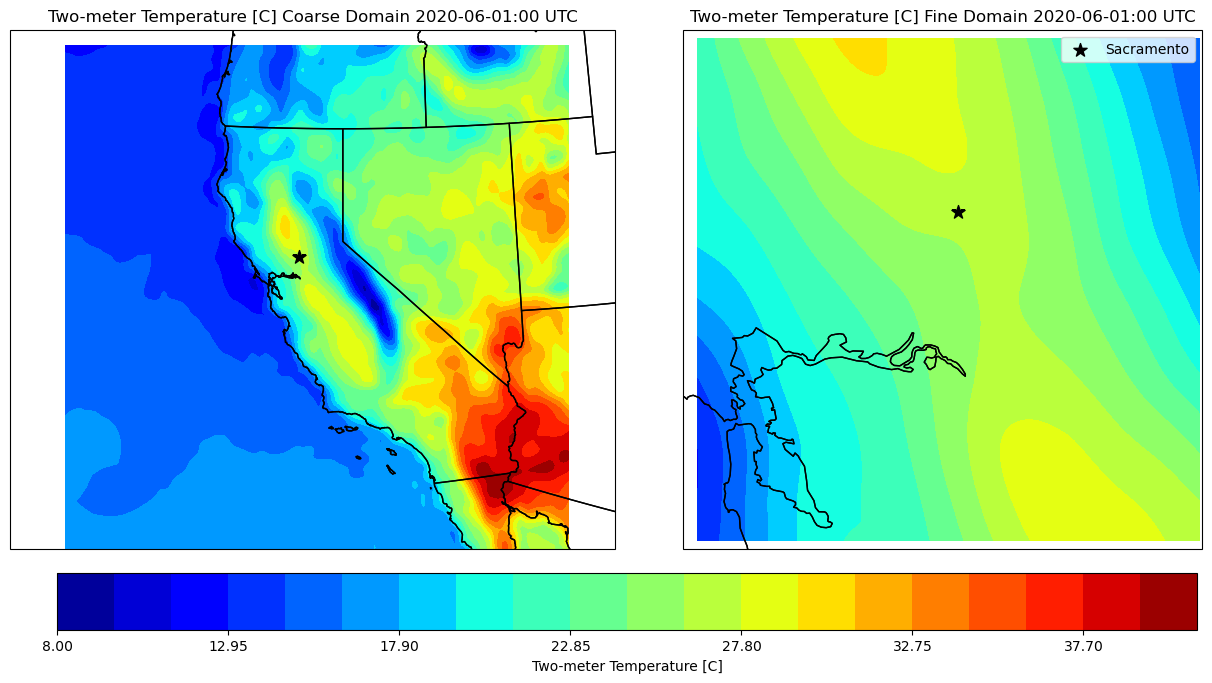

In [9]:
# Extract the 2-m level temperature
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var1).min(), to_np(Var2).min()))
#print(vmin)
vmax = np.ceil(max(to_np(Var1).max(), to_np(Var2).max()))
#print(vmax)
levels = np.linspace(vmin-273, vmax-273, 21)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(20, 8))

# Reduce extra margins
fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Two-meter Temperature [C] Coarse Domain 2020-06-01:00 UTC")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1)-273, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Two-meter Temperature [C] Fine Domain 2020-06-01:00 UTC")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2)-273, transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.095, pad=0.04)
cbar.set_label("Two-meter Temperature [C]")

plt.legend()
plt.show()

### Albedo

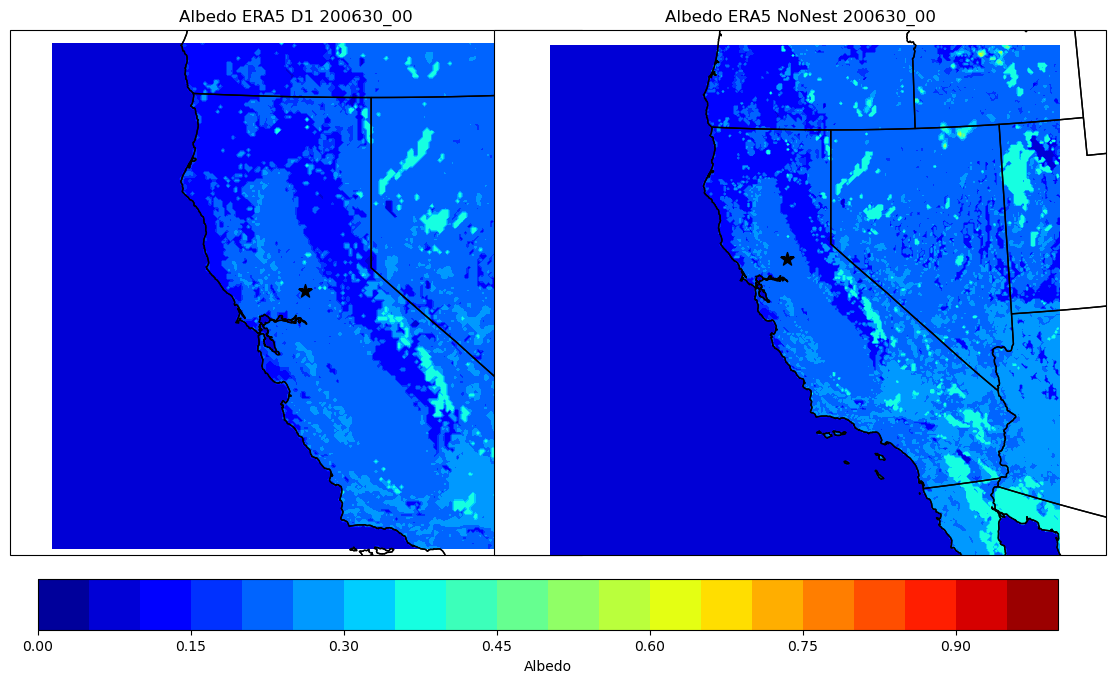

In [11]:
# Extract the 2-m level temperature
Var1 = getvar(ncfile1, "ALBEDO")
Var2 = getvar(ncfile2, "ALBEDO")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var1).min(), to_np(Var2).min()))
#print(vmin)
vmax = np.ceil(max(to_np(Var1).max(), to_np(Var2).max()))
#print(vmax)
levels = np.linspace(vmin, vmax, 21)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.5}, figsize=(18, 8))

# Reduce extra margins
fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot
ax1.set_title("Albedo ERA5 D1 200630_00")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1), transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Second contour plot
ax2.set_title("Albedo ERA5 NoNest 200630_00")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2), transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.085, pad=0.04)
cbar.set_label("Albedo")

plt.show()

## End of Script